**To install Dask**


python -m pip install "dask[complete]"

or

pip -m install dask

There is unfortunately an issue with Dask and both google colab and hemera right now. Luckily, you can run dask very easily on a local jupyter notebook if you want to follow along during this presentation.

**Parallel computing:**
The act of a computational problem being split into smaller, independent segments that are then ran on multiple processors at the same time. This can cut down on execution time substantially. 

In [1]:
from dask import delayed

In order to understand the benefits of parallel, lets create a function called working. This function simply waits for a number of seconds equal to x and then returns x, sleep is a good way to simulate work being done. 

In [2]:
from time import sleep

def working(x):
    sleep(x)
    return x

def add(x, y):
    return x + y


In [3]:
%%time

x = working(5)
y = working(5)
z = add(x, y)
print(z)

10
Wall time: 10 s


As we would expect, this code takes about  10 seconds to run. Now lets see how long it would take if it were run in parallel. Don't worry about the syntax yet, only on the output and time of execution

In [4]:
%%time

x = delayed(working)(5)
y = delayed(working)(5)
z = delayed(add)(x,y)
print(z.compute())

10
Wall time: 5.02 s


When run in parallel, the code only takes about 5 seconds. This is because both instances of working (which each take 5 seconds to complete) are being run at the same time on different processors.

**What is Dask?**

Dask is a python library that provides a lot of functionality related to parallel programming. The library contains resources for parallelizing simple tasks through the use of Numpy-like Dask arrays as well as tools to build complex parallel programs through the use of lazy computation with delayed() functions.

Dask also provides a way to visualize your program through the use of dask.visualize(), which will create an easily readable task graph of your computed function for greater understanding of that function’s inputs.

**Lazy Computation**

Lazy computation is how Dask parallelizes your code. Any function that is called using Dask’s delayed feature will not be executed immediately, it will instead be transformed into a task graph, which will be executed upon calling the compute function. These task graphs keep track of every operation that must be done to produce the outcome of a given function and store those operations so that they can be carried out in parallel later.

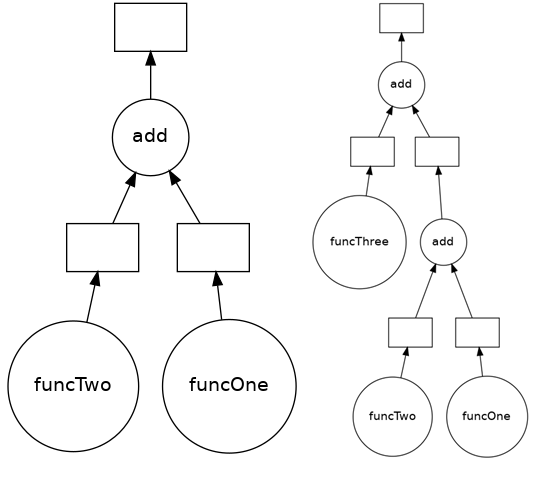

These are examples of graphs of dependencies that are constructed through Dask’s lazy computation. As soon as Dask’s compute command is called on a function, that function’s task graph will be executed in parallel.

Dask compute is smart and will automatically do its best to optimize the graph for parallelization upon being called.

**Dask Arrays**

Dask arrays are by far the easiest and quickest way to utilize Dask to parallelize your code. Dask arrays are a data structure built on top of Numpy that offers almost identical functionality but have two main distinctions.

*Dask arrays are computed lazily*

Any operations performed on a dask array will be evaluated lazily, so basic functions on the array will build a task graph automatically. This is why it is the easiest way to utilize Dask, almost all of Numpy’s functions can be used on the array, and those functions will be automatically evaluated in parallel once compute is called.

In [5]:
import dask.array as da
import numpy as np

npArray = np.array([1,2,3,4,5])
myDaskArray = da.from_array(npArray)
sumOfArray = myDaskArray.sum()

A task graph that computes the sum has now been created, and will be run in parallel when we call

In [7]:
sumOfArray.compute()

15

*Dask arrays are distributed*

Instead of having to load a massive dataset directly into memory, Dask arrays reference specific chunks of your dataset while it is still on disk. This is massively helpful if you are performing operations on a large dataset that might not fit into memory.

Dask arrays break up the dataset into chunks of a specified size:

In [ ]:
myArray = da.from_array({your_dataset_here}, chunks=(1_000_000,1_000_000))

When a function on an array is evaluated, the dataset will be walked through chunk by chunk, so that the entire dataset doesn’t have to be loaded into memory at once.

Chunk size here is important, while there is no concrete rule of thumb for how to size your chunks, it holds true that larger chunk sizes will be more time efficient and smaller chunk sizes will be more memory efficient.

Because Dask is built on top of Numpy, almost all of the functionality is carried over from traditional Numpy arrays. You can still:

Use arithmetic operations

In [8]:
#Multiply a Dask array
DaskMulti = myDaskArray * 2
DaskMulti.compute()

array([ 2,  4,  6,  8, 10])

In [9]:
#Add two Dask arrays 
myDaskArray2 = da.from_array([6,7,8,9,10])
DaskAdded = myDaskArray + myDaskArray2
DaskAdded.compute()

array([ 7,  9, 11, 13, 15])

In [10]:
#Find min of Dask array
DaskMin = myDaskArray.min()
DaskMin.compute()

1

In [11]:
#Find max of Dask array
DaskMax = myDaskArray.max()
DaskMax.compute()

5

Do reductions along axes

In [12]:
npArray3 = np.array([[1,2,3,4,5],
                     [6,7,8,9,10],
                     [11,12,13,14,15]]) #create a 2d array
myDaskArray3 = da.from_array(npArray3)

In [13]:
sumOfY = myDaskArray3.sum(axis = 0) #take a sum about the y axis
sumOfY.compute()

array([18, 21, 24, 27, 30])

In [14]:
sumOfX = myDaskArray3.sum(axis = 1) #take a sum about the x axis
sumOfX.compute()

array([15, 40, 65])

Slice

In [15]:
students = np.array([['John','Alice','Bob','Sam'],
                     [69,89,12,56],
                     [34,87,90,23]])
daskStudents = da.from_array(students)

In [16]:
#accessing rows
daskStudents[0].compute()

array(['John', 'Alice', 'Bob', 'Sam'], dtype='<U11')

In [17]:
daskStudents[1].compute()

array(['69', '89', '12', '56'], dtype='<U11')

In [18]:
#accessing colummns
daskStudents[:,0].compute()


array(['John', '69', '34'], dtype='<U11')

In [19]:
daskStudents[:,1].compute()

array(['Alice', '89', '87'], dtype='<U11')

**Dask Dataframes**


Dask also inclues a less mature but still usefull data structure called a Dask dataframe. Dateframes are built on top of Pandas, and mantain a lot of the funcitonality of Pandas.

Dask arrays are to Numpy as Dask dataframes are to Pandas. They allow both performances increases in certain situations due to their capacity for parallel processing, as well as the ability to work with very large data sets that won't fit in memory due to their distributed nature.

In [32]:

import dask.dataframe as dd

In [44]:
climateData = dd.read_csv('~/Desktop/dask_presentation/data/DailyDelhiClimateTest.csv') #read a csv as a Dask dataframe
climateData.compute()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


We can access all of the same default variables as a normal Pandas dataframe

In [54]:
climateData.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [52]:
climateData.index.compute()

RangeIndex(start=0, stop=114, step=1)

In [57]:
climateData.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [55]:
climateData.values.compute()

array([['2017-01-01', 15.91304347826087, 85.8695652173913,
        2.743478260869565, 59.0],
       ['2017-01-02', 18.5, 77.22222222222223, 2.8944444444444444,
        1018.2777777777778],
       ['2017-01-03', 17.11111111111111, 81.88888888888889,
        4.016666666666667, 1018.3333333333334],
       ['2017-01-04', 18.7, 70.05, 4.545, 1015.7],
       ['2017-01-05', 18.38888888888889, 74.94444444444444,
        3.3000000000000003, 1014.3333333333334],
       ['2017-01-06', 19.318181818181817, 79.31818181818181,
        8.681818181818182, 1011.7727272727273],
       ['2017-01-07', 14.708333333333334, 95.83333333333331,
        10.041666666666664, 1011.375],
       ['2017-01-08', 15.68421052631579, 83.52631578947368, 1.95,
        1015.55],
       ['2017-01-09', 14.571428571428571, 80.80952380952381,
        6.542857142857142, 1015.952380952381],
       ['2017-01-10', 12.11111111111111, 71.94444444444444,
        9.361111111111107, 1016.8888888888888],
       ['2017-01-11', 11.0, 72.111

Column-wise operations

In [46]:
avgHumidity = climateData.humidity.mean()
print(avgHumidity.compute())


56.25836183726328


In [50]:
climateData[['humidity','wind_speed']].compute() #print only humidity and wind speed columns

,humidity,wind_speed
0,85.869565,2.743478
1,77.222222,2.894444
2,81.888889,4.016667
3,70.050000,4.545000
4,74.944444,3.300000
...,...,...
109,27.500000,5.562500
110,39.375000,6.962500
111,40.900000,8.890000
112,27.500000,9.962500


Location operations

In [59]:
climateData.loc[2:5,['humidity','wind_speed']].compute()

,humidity,wind_speed
2,81.888889,4.016667
3,70.050000,4.545000
4,74.944444,3.300000
5,79.318182,8.681818


In [61]:
climateData.iloc[:, [2,3]].compute()

,humidity,wind_speed
0,85.869565,2.743478
1,77.222222,2.894444
2,81.888889,4.016667
3,70.050000,4.545000
4,74.944444,3.300000
...,...,...
109,27.500000,5.562500
110,39.375000,6.962500
111,40.900000,8.890000
112,27.500000,9.962500


**plotting**

As with Pandas, you can use matplotlib's functionality to plot and visualize your data.

<AxesSubplot:>

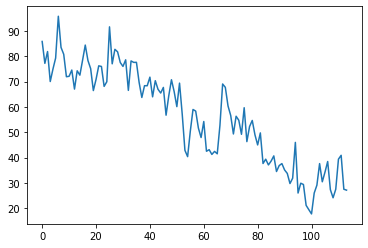

In [62]:
%matplotlib inline

climateData.humidity.compute().plot()